In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [9]:
data =  pd.read_csv(r"../data/MIT-BIH Arrhythmia Database.csv")

## Correlation Heatmap of Lead-II Features (0_)

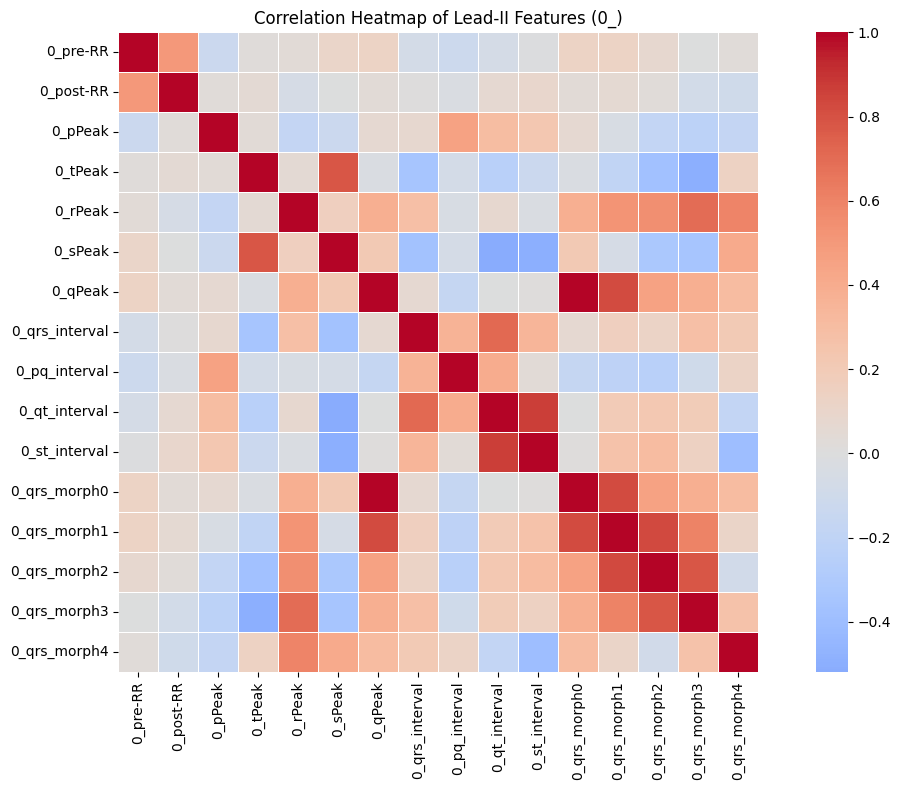

In [14]:
# Limit to a subset to avoid overcrowding (e.g., only Lead-II: columns starting with "0_")
lead_0_features = [col for col in data.columns if col.startswith("0_")]

plt.figure(figsize=(12, 8))
corr_matrix = data[lead_0_features].corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Lead-II Features (0_)")
plt.tight_layout()
plt.show()

## Univariate Distribution Plots for ECG Signal Features

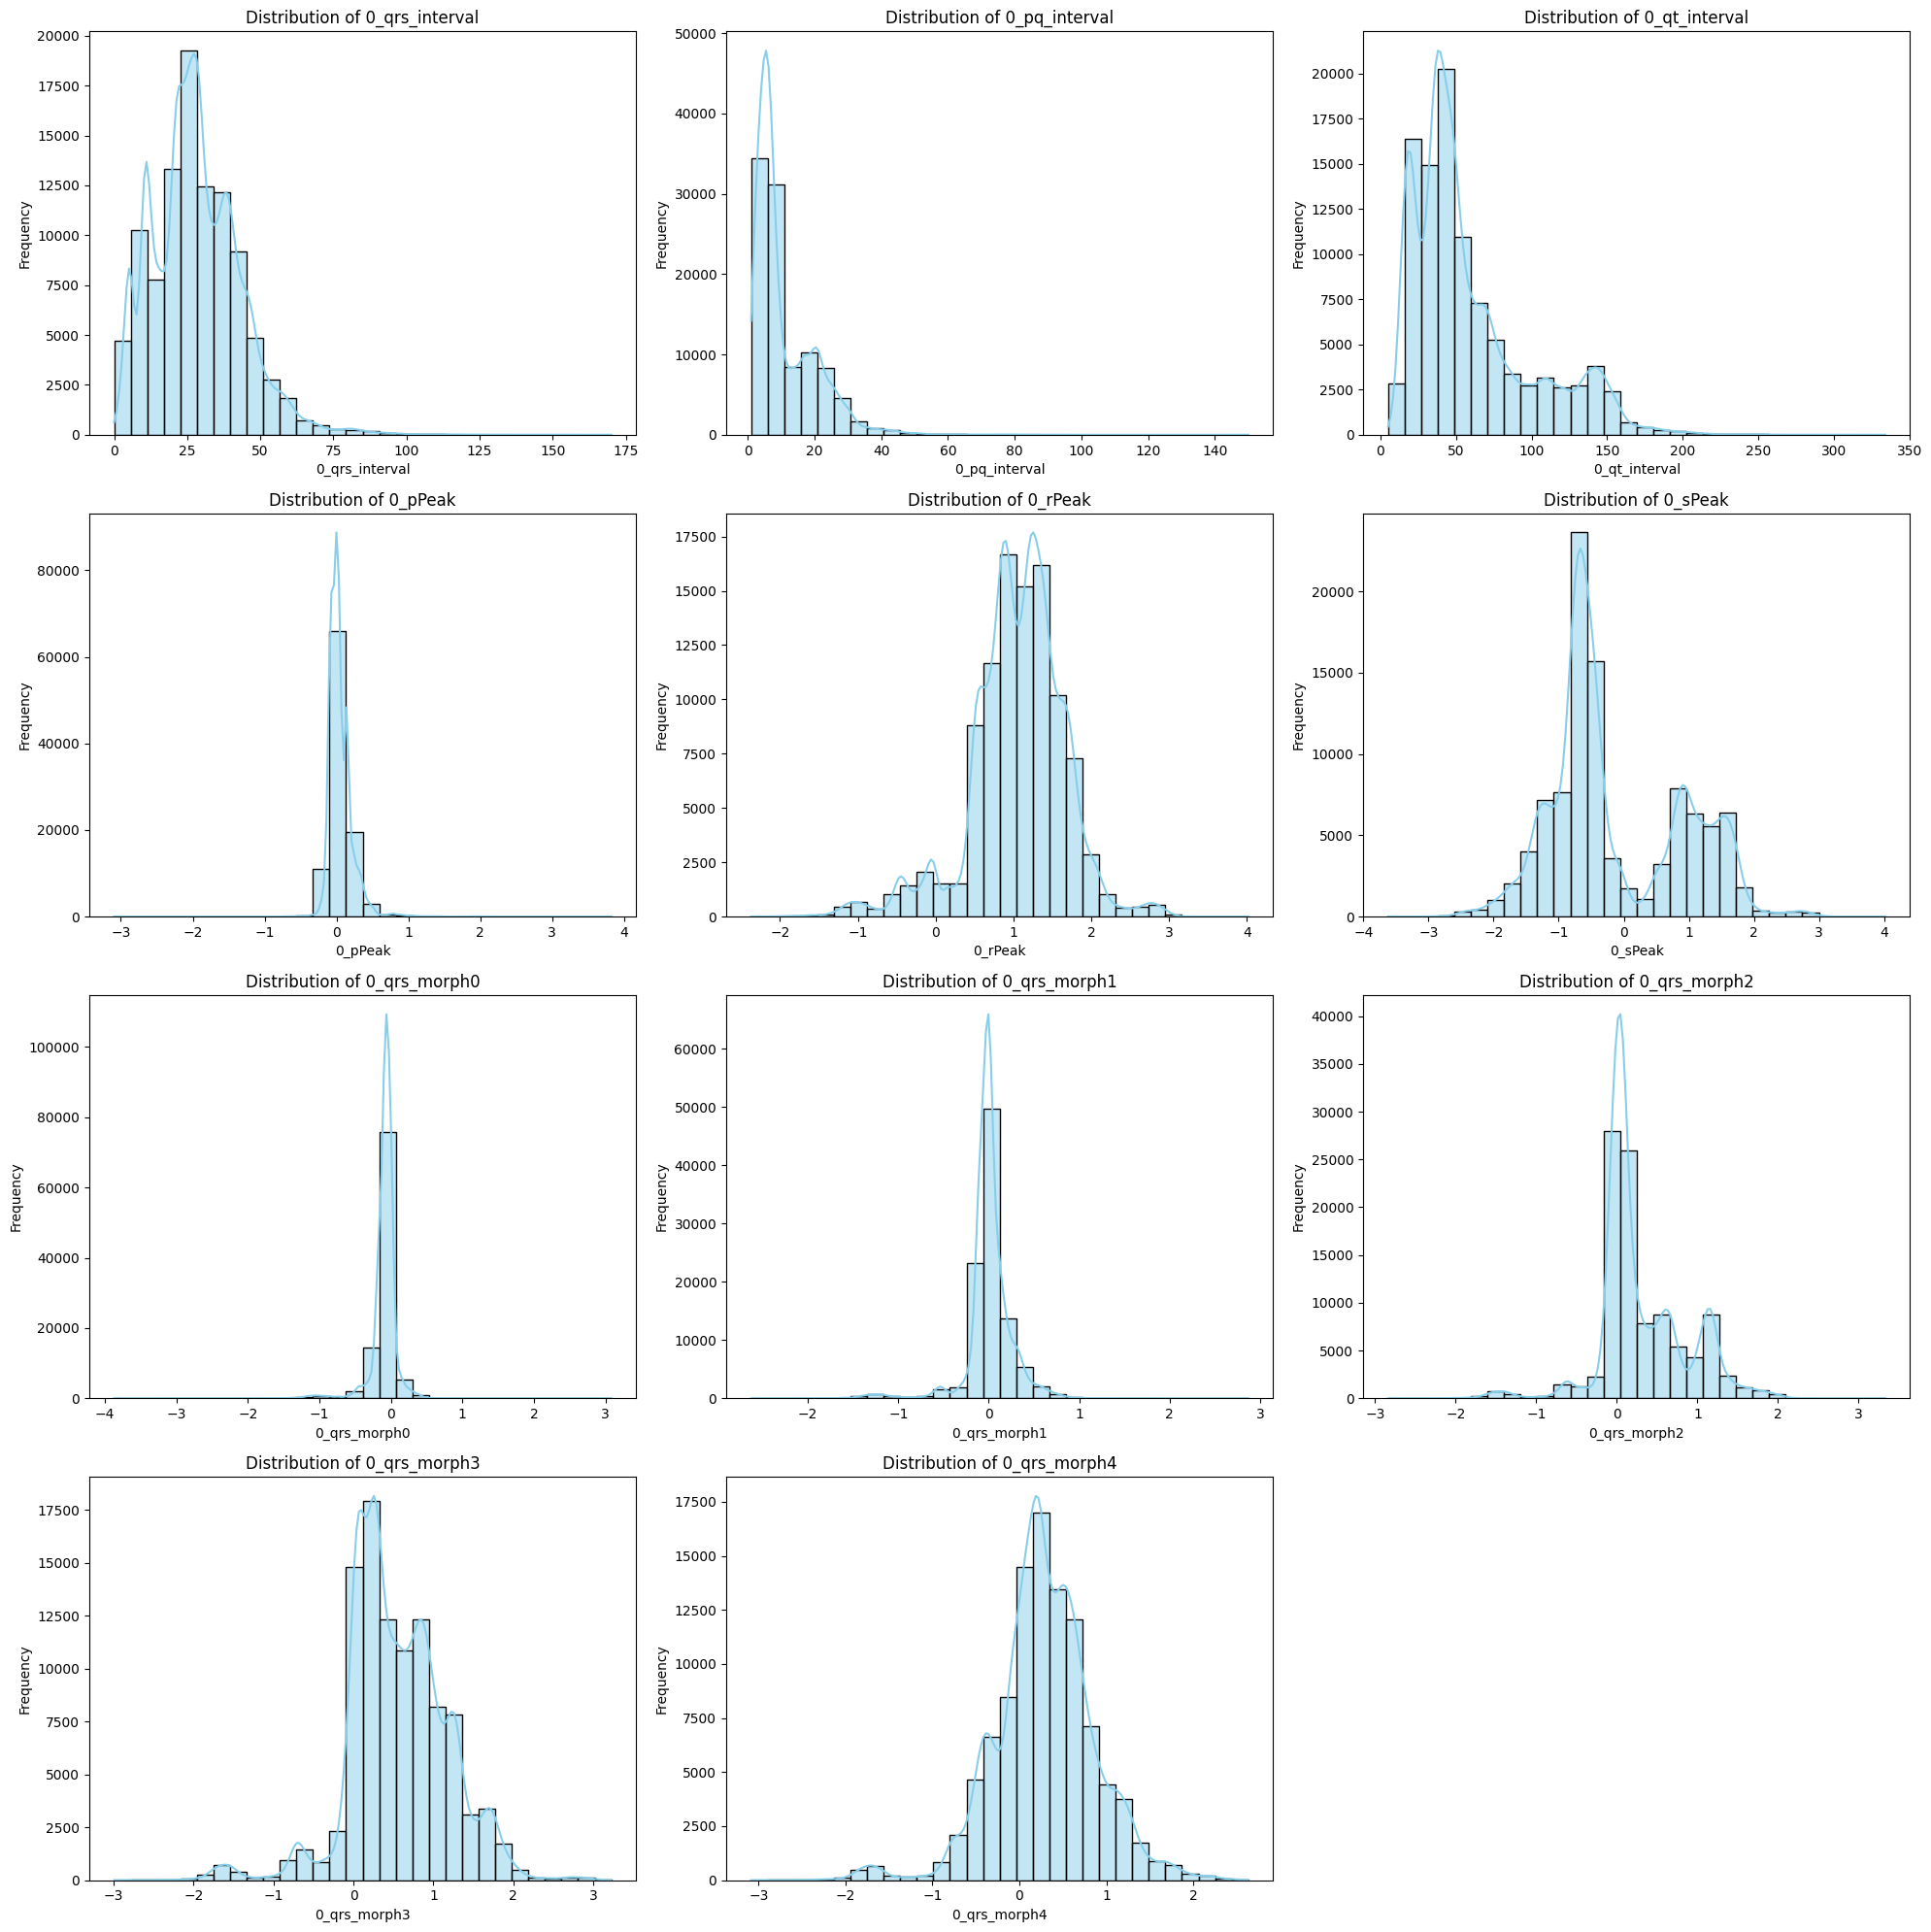

In [13]:
features = [
    '0_qrs_interval', '0_pq_interval', '0_qt_interval',
    '0_pPeak', '0_rPeak', '0_sPeak',
    '0_qrs_morph0', '0_qrs_morph1', '0_qrs_morph2', '0_qrs_morph3', '0_qrs_morph4'
]

plt.figure(figsize=(20, 20))
for i, col in enumerate(features):
    plt.subplot(4, 3, i + 1)
    sns.histplot(data[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## Distribution of rPeak (Lead-II) per class

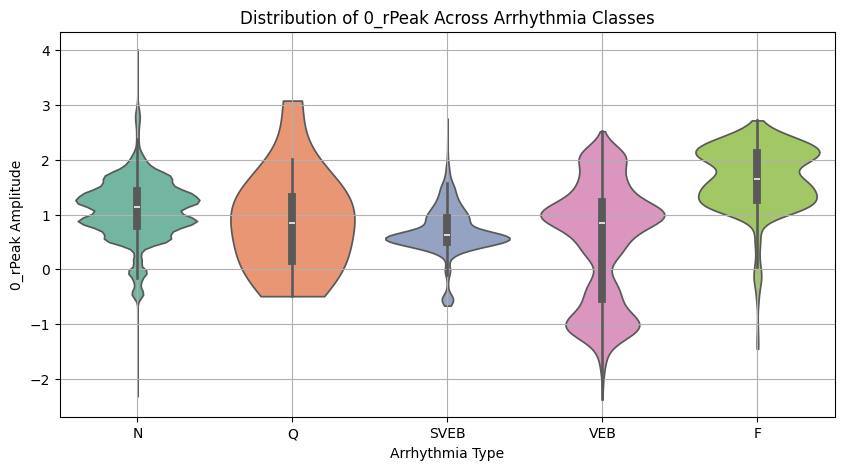

In [16]:
plt.figure(figsize=(10, 5))
sns.violinplot(data=data, x='type', y='0_rPeak', hue='type', palette='Set2', cut=0, legend=False)
plt.title("Distribution of 0_rPeak Across Arrhythmia Classes")
plt.xlabel("Arrhythmia Type")
plt.ylabel("0_rPeak Amplitude")
plt.grid(True)
plt.show()

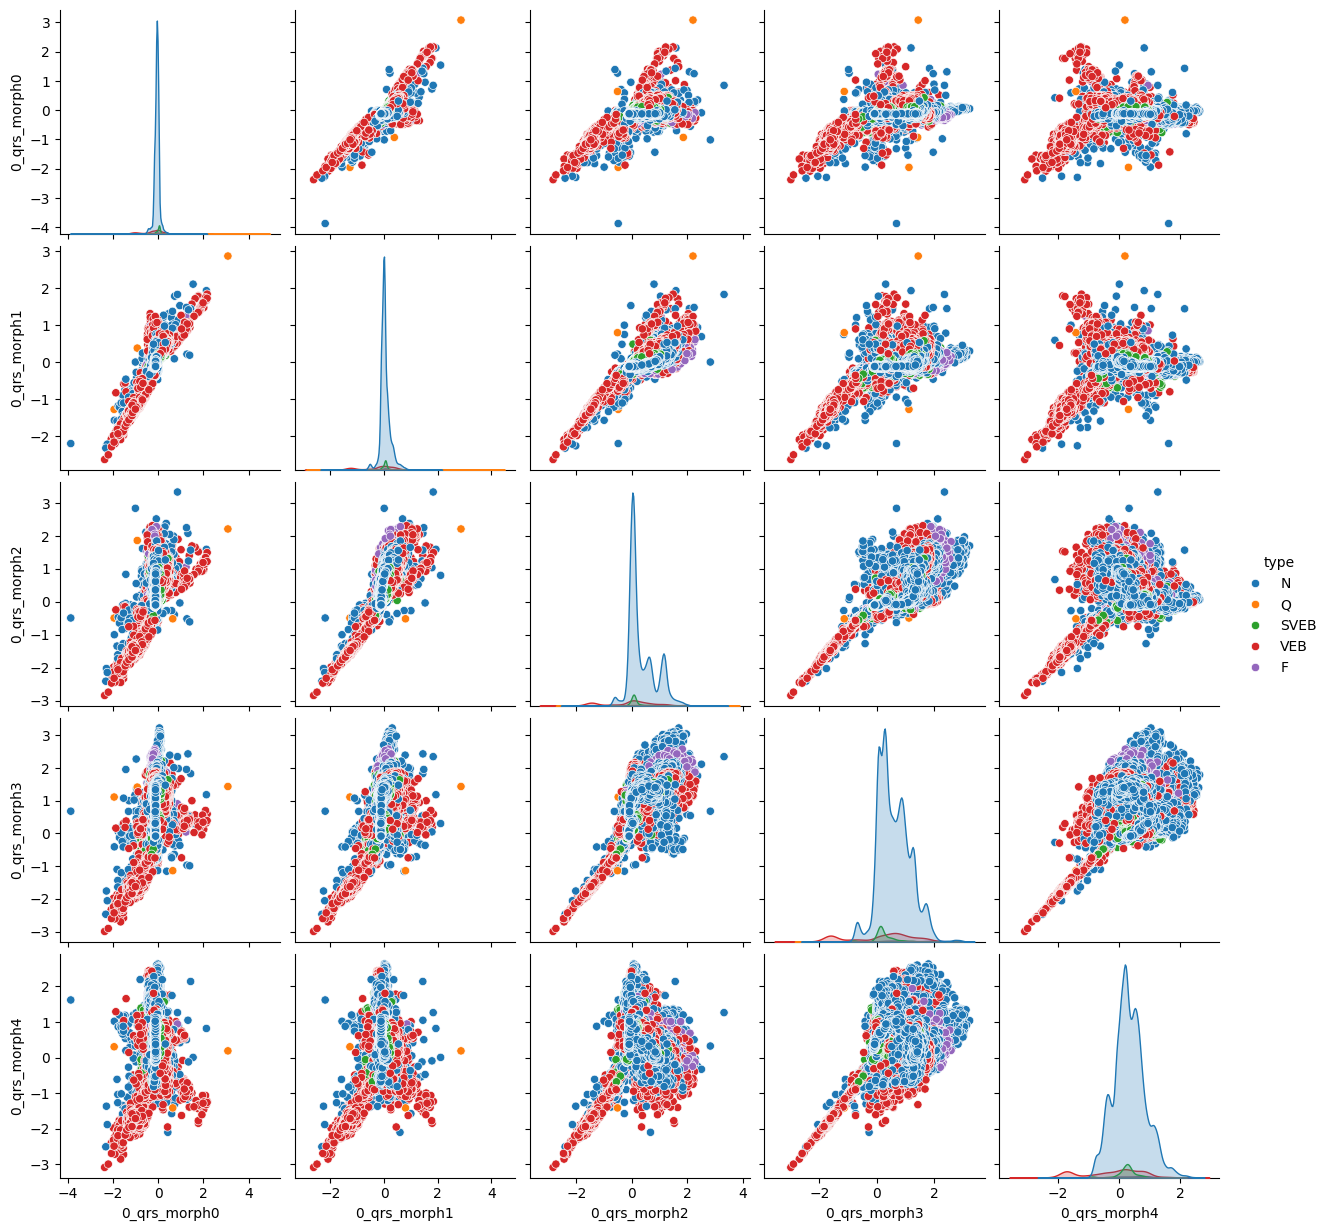

In [ ]:
morph_cols = ['0_qrs_morph0', '0_qrs_morph1', '0_qrs_morph2', '0_qrs_morph3', '0_qrs_morph4']
sns.pairplot(data[morph_cols + ['type']], hue='type')

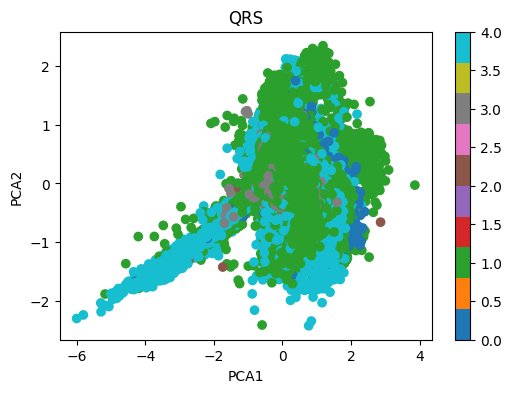

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
morph_pca = pca.fit_transform(data[morph_cols])

plt.figure(figsize=(6,4))
plt.scatter(morph_pca[:, 0], morph_pca[:, 1], c=data['type'].astype('category').cat.codes, cmap='tab10')
plt.title("QRS")
plt.xlabel("PCA1"); plt.ylabel("PCA2")
plt.colorbar()
plt.show()
